# An Overview of GANs

GANs are able to learn how to model the input distribution by training two
competing (and cooperating) networks referred to as generator and discriminator (sometimes known as critic)

The role of the generator is to keep on figuring out how to generate fake data or signals (this includes audio and images) that can fool the discriminator.

Meanwhile, the discriminator is trained to distinguish between fake and real signals. As the training progresses, the discriminator will no longer be able to see the difference between the synthetically generated data and the real data.

From there, the discriminator can be discarded, and the generator can then be used to create new realistic data that have never been observed before.

how do we achieve stable training of the generator-discriminator network? 

There must be a healthy competition between the generator and discriminator in order for both networks to be able to learn simultaneously.

Since the loss function is computed from the output of the discriminator, its parameters update quickly. When the discriminator converges faster, the generator no longer receives sufficient gradient updates for its parameters and fails to converge.

Other than being hard to train, GANs can also suffer from either a partial or total modal collapse, a situation wherein the generator is producing almost similar outputs for different latent encodings.

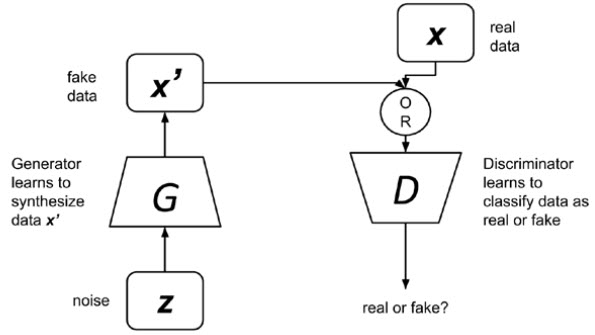

The input to the generator is noise, and the output is synthesized data. Meanwhile, the discriminator's input will either be real or synthesized data.

Genuine data comes from the true sampled data, while the fake data comes from the generator. All of the valid data is labeled 1.0 (that is, a 100 % probability of being real), while all the synthesized data is labeled 0.0 (that is, a 0 % probability of being real).

Since the labeling process is automated, GANs are still considered part of the unsupervised learning approach in deep learning

The objective of the discriminator is to learn from this supplied dataset on how to distinguish real data from fake data. 

During this part of GAN training, only the discriminator parameters will be updated. Like a typical binary classifier, the discriminator is trained to predict on a range of 0.0 to 1.0 in confidence values on how close the given input data is to the real data.

At regular intervals, the generator will pretend that its output is genuine data and will ask the GAN to label it as 1.0. When the fake data is then presented to the discriminator, naturally it will be classified as fake with a label close to 0.0.

The optimizer computes the generator parameter updates based on the presented
label (that is, 1.0). It also takes its own prediction into account when training on this new data. In other words, the discriminator has some doubts regarding its prediction, and so, the GAN takes that into consideration. 

The GAN will let the gradients backpropagate from the last layer of the discriminator down to the first layer of the generator. However, in most practices, during this phase of training, the discriminator parameters are temporarily frozen. The generator will use the gradients to update its parameters and improve its ability to synthesize fake data.

The whole process is akin to two networks competing with one another while still cooperating at the same time. When the GAN training converges, the end
result is a generator that can synthesize data that appears genuine. The discriminator thinks this synthesized data is real or with a label near 1.0, which means the discriminator can then be discarded. The generator part will be useful in producing meaningful outputs from arbitrary noise inputs.

the discriminator can be trained by minimizing the loss function binary cross-entropy cost function.

What differentiates GANs from other networks is they are notoriously difficult to train. Something as simple as a minor change in the layers can drive the network to training instability.

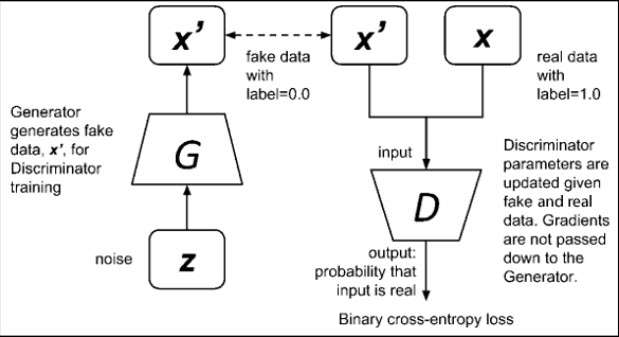

# DCGAN

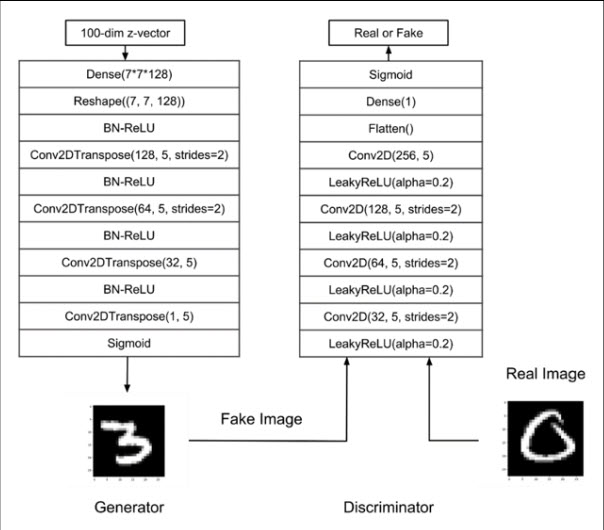

DCGAN implements the following design principles:

• Use strides > 1, and a convolution instead of MaxPooling2D or UpSampling2D.
With strides > 1, the CNN learns how to resize the feature maps.

• Avoid using Dense layers. Use CNN in all layers. The Dense layer is utilized
only as the first layer of the generator to accept the z-vector. The output of
the Dense layer is resized and becomes the input of the succeeding CNN
layers.

• Use Batch Normalization (BN) to stabilize learning by normalizing the input
to each layer to have zero mean and unit variance. There is no BN in the
generator output layer and discriminator input layer. 

• Rectified Linear Unit (ReLU) is used in all layers of the generator except in the output layer, where the tanh activation is utilized.

• Use Leaky ReLU in all layers of the discriminator. Unlike ReLU, instead
of zeroing out all outputs when the input is less than zero, Leaky ReLU
generates a small gradient equal to alpha x input. 

Setting the learning rate of the adversarial equal to half of the discriminator will result in more stable training. 

GAN training has two parts: discriminator training and generator training, which is adversarial training with discriminator weights frozen.

The generator is then trained via an adversarial network. The training first randomly picks a batch of real images from the dataset. This is labeled as real (1.0). Then, a batch of fake images will be generated by the generator.

This is labeled as fake (0.0). The two batches are concatenated and are used to train the discriminator.

After this is complete, a new batch of fake images will be generated by the generator and labeled as real (1.0). This batch will be used to train the adversarial network. The two networks are trained alternately for about 40,000 steps.

# Conditional GAN

a condition is imposed on both the generator and discriminator inputs. 
The condition is in the form of a one-hot vector version of the digit. This is associated with the image to be produced (generator) or classified as real or fake (discriminator).

CGAN is similar to DCGAN except for the additional one-hot vector input. For the generator, the one-hot label is concatenated with the latent vector before the Dense layer. For the discriminator, a new Dense layer is added. 

The new layer is used to process the one-hot vector and reshape it so that it is suitable for concatenation to the other input of the succeeding CNN layer.

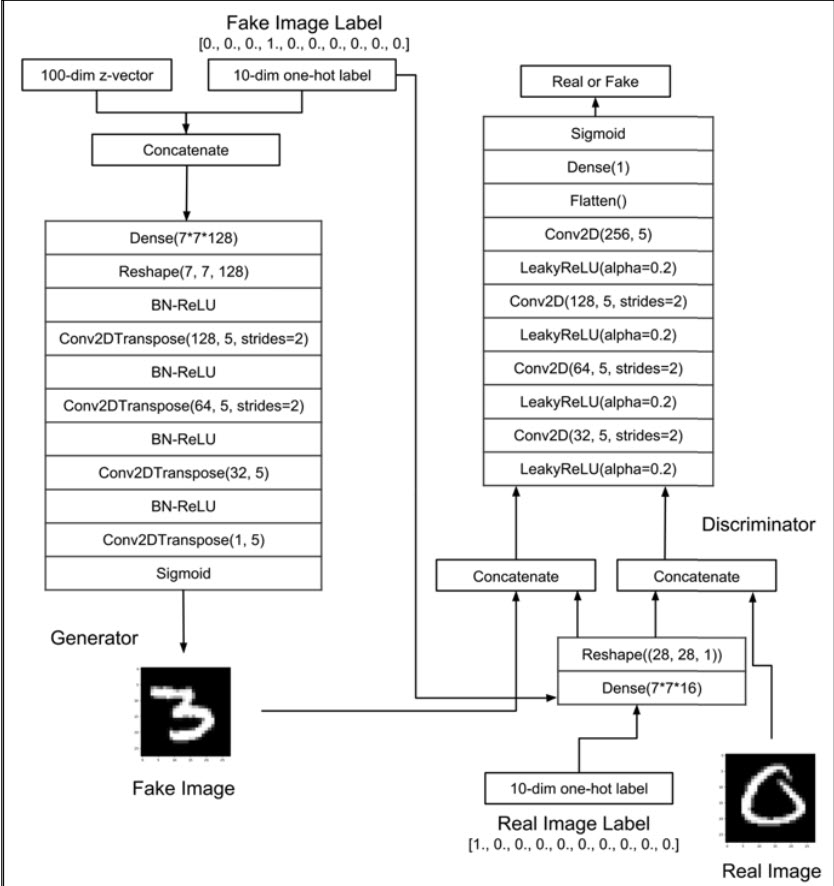

The generator learns to generate fake images from a 100-dim input vector and
a specified digit. The discriminator classifies real from fake images based on real and fake images and their corresponding labels.

The basis of a CGAN is still the same as the original GAN principle except that the discriminator and generator inputs are conditioned on one-hot labels, y

The new loss function of the discriminator aims to minimize the error of predicting real images coming from the dataset and fake images coming from the generator given their one-hot labels.

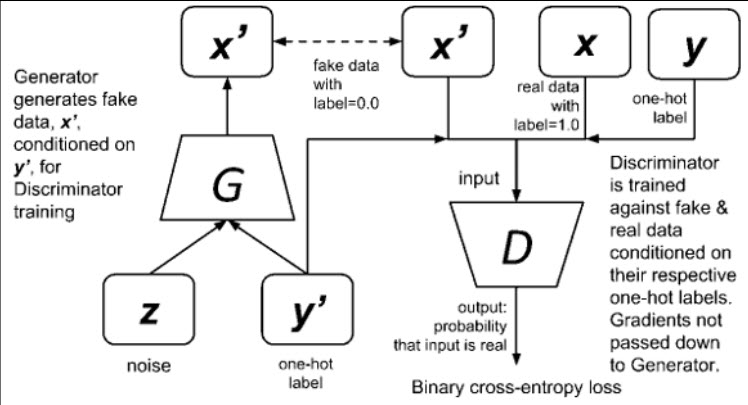

The new loss function of the generator minimizes the correct prediction of the
discriminator on fake images conditioned on the specified one-hot labels

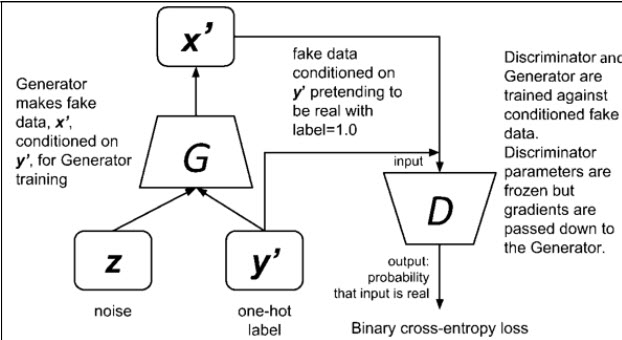

The CGAN discriminator is firstly trained with one batch of real and fake data conditioned on their respective one-hot labels. Then, the generator parameters are updated by training the adversarial network given one-hot label conditioned fake data pretending to be real. Similar to DCGAN, the discriminator weights are frozen during adversarial training.

With CGAN, it's like having an agent that we can ask to draw digits similar to how humans write digits. The key advantage of CGAN over DCGAN is that we can
specify which digit we want the agent to draw.